# Randomly select 2500 data points (the training dataset train_rev1 contains nearly 250k) for ease of analysis. Now perform the tasks in Part A and B.

In [58]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
from nltk.corpus import stopwords

df = pd.read_csv("Train_rev1.csv")

In [13]:
df[:10]


,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
5,13179816,Engineering Systems Analyst Water Industry,Engineering Systems Analyst Water Industry Loc...,"Dorking, Surrey, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20K to 30K,25000,cv-library.co.uk
6,14131336,Senior Subsea Pipeline Integrity Engineer,A globally renowned engineering and training c...,"Aberdeen, Borders",UK,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,50000 - 100000/annum,75000,cv-library.co.uk
7,14663196,RECRUITMENT CONSULTANT INDUSTRIAL / COMMERCIA...,THIS IS A LIVE VACANCY NOT A GENERIC ADVERTISE...,"MANCHESTER, Greater Manchester",Manchester,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 26000/annum TO 26K BASIC + COMM + BENS,22000,cv-library.co.uk
8,14663197,RECRUITMENT CONSULTANT CONSTRUCTION / TECHNIC...,This is an exceptional opportunity to join a c...,"LEEDS, West Yorkshire",Leeds,NaN,permanent,Code Blue Recruitment,HR & Recruitment Jobs,18000 - 28000/annum 18 - 28K BASIC + COMM + BENS,23000,cv-library.co.uk
9,15395797,Subsea Cables Engineer,A subsea engineering company is looking for an...,"Aberdeen, UK",Aberdeen,NaN,permanent,Indigo 21 Ltd,Engineering Jobs,70000 - 100000/annum,85000,cv-library.co.uk




# Part A 

## A1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do 
these numbers change if you exclude stopwords?
Hint: nltk.org is a great resource for exploring text mining with Python. There are many examples that 
are similar to the questions in this assignment.  

In [50]:
# Draw random sample of 2500.
rows = np.random.choice(df.index.values, 2500)

words = []
for i in rows:
    words += word_tokenize(df["FullDescription"][i])
    
tags = nltk.pos_tag(words)
# fdist = FreqDist(words)

# https://stackoverflow.com/questions/10674832/count-verbs-nouns-and-other-parts-of-speech-with-pythons-nltk
counts = Counter(tag for word,tag in tags) # Go through word and then tag through tags then count only the number of tags
counts

    


Counter({'DT': 50800,
         'JJ': 55797,
         'CC': 31750,
         'VBD': 3238,
         'NNS': 44327,
         'VBN': 11946,
         'NN': 115906,
         'VBZ': 10348,
         'IN': 65255,
         'NNP': 87270,
         '.': 22805,
         'MD': 10426,
         'VB': 32664,
         'VBG': 20832,
         ',': 24103,
         'RB': 14940,
         'PRP$': 7886,
         'VBP': 12011,
         'PRP': 12942,
         'TO': 20825,
         'RP': 909,
         'WP': 1524,
         '(': 2292,
         ')': 2332,
         'WRB': 940,
         'RBS': 211,
         ':': 5710,
         'CD': 4598,
         'WDT': 1459,
         'FW': 311,
         'PDT': 140,
         'JJR': 839,
         'NNPS': 1486,
         '``': 149,
         'JJS': 1141,
         'EX': 239,
         'POS': 749,
         "''": 83,
         'RBR': 249,
         '$': 45,
         'WP$': 22,
         'UH': 23})

In [82]:
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
# https://www.programiz.com/python-programming/methods/built-in/sorted - key 
counts_sorted = sorted(counts.items(), reverse = True, key = lambda x: x[1]) # Need counts to be counts.items()
print counts_sorted[:5] # Top five PoS is NN, NNP, IN, JJ, and DT in that order. Frequency depicted below.

# NEED TO MAKE SURE EVERYTHING IS LOWER CASE FIRST BEFOREHAND.
# Stop words is in lower case, so our words have to be lower case too. Let's not forget that.
words_lower = []

for word in words:
    # words_lower += word.lower() - Need to use append instead. Otherwise, adds each character.
    words_lower.append(word.lower())

print (words[:5])
print (words_lower[:5])
print (stopwords.words("english")[:5])



['A', 'dynamic', 'and', 'established', 'Midlands']
['a', 'dynamic', 'and', 'established', 'midlands']
['i', 'me', 'my', 'myself', 'we']


def takeSecond(elem):
    return elem[1]

Both top and bottom are equivalent

lambda x : x[1]

In [97]:
stops = set(stopwords.words("english")) # Makes it much faster
# https://stackoverflow.com/questions/5486337/how-to-remove-stop-words-using-nltk-or-python
filtered_words = [word for word in words_lower if word not in stops] # Faster than below since it skips a few
# steps.

filtered_tags = nltk.pos_tag(filtered_words)
filtered_tags
filtered_counts = Counter(tag for word, tag in filtered_tags) # Go through word and then tag through tags then count only the number of tags
filtered_counts


Counter({'JJ': 74295,
         'VBD': 7489,
         'NNS': 51157,
         'VBN': 8169,
         'NN': 163479,
         '.': 22805,
         'VBG': 24283,
         ',': 24103,
         'RB': 13470,
         'VBP': 12985,
         'NNP': 4937,
         'MD': 2653,
         'VB': 10193,
         'CC': 1554,
         'IN': 5991,
         '(': 2292,
         ')': 2332,
         'VBZ': 3502,
         ':': 5710,
         'PRP': 619,
         'CD': 4714,
         'FW': 640,
         'JJS': 1208,
         'JJR': 406,
         'DT': 338,
         'RBR': 173,
         '``': 149,
         'WDT': 29,
         'UH': 39,
         'POS': 814,
         "''": 107,
         'RBS': 54,
         'RP': 64,
         'WRB': 24,
         '$': 79,
         'WP$': 22,
         'WP': 34,
         'EX': 8,
         'PRP$': 5})

The code below is too slow.

filtered_word_list = words[:] #make a copy of the word_list. Need to have the [:] to indicate we're copying, not storing it here.
for word in words: # iterate over word_list
  if word in stopwords.words('english'): 
    filtered_word_list.remove(word) # remove word from filtered_word_list if it is a stopword

In [98]:
filtered_counts_sorted = sorted(filtered_counts.items(), reverse = True, key = lambda x: x[1]) # Need counts to be counts.items()
filtered_counts_sorted[:5] # Top five PoS is NN, JJ, NNS, VBG, and , in that order. Frequency depicted below.
#  NNP, IN, and DT drops completely from the top five, meanwhile VBG and , enter the top five.

[('NN', 163479), ('JJ', 74295), ('NNS', 51157), ('VBG', 24283), (',', 24103)]

## A2.
Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

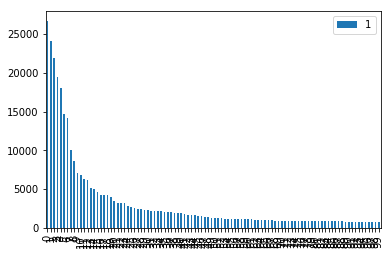

In [116]:
word_counts = Counter(word for word in words)
sorted_wc = sorted(word_counts.items(), reverse = True, key = lambda x: x[1]) # Need to indicate word_counts is an item() of key and value
sorted_wc[:100]
dfSortedWC = pd.DataFrame(sorted_wc) # Needs to be made into df to plot.
dfsortedwc[:100].plot(kind = "bar")

def takeSecond(elem):
    return elem[1]

Both top and bottom are equivalent

lambda x : x[1]